# **Data Preprocessing (ใช้ Apache Spark)**

### ติดตั้ง Spark และ PySpark

In [1]:
!apt-get update
!apt-get install openjdk-17-jdk-headless -qq > /dev/null
!curl -O https://archive.apache.org/dist/spark/spark-3.5.1/spark-3.5.1-bin-hadoop3.tgz
!tar xf spark-3.5.1-bin-hadoop3.tgz
!pip install -q findspark

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-17-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.1-bin-hadoop3"

!pip install pyspark==3.5.1

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 https://cli.github.com/packages stable InRelease
Hit:4 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
  % Total    %

In [2]:
!ls

sample_data		 spark-3.5.1-bin-hadoop3.tgz
spark-3.5.1-bin-hadoop3  Telco_customer_churn.csv


In [8]:
# สร้าง Spark Session เพิ่อใช้งาน Spark
from pyspark.sql import SparkSession
spark = SparkSession.builder \
    .master("local[*]") \
      .appName("Project ML App 01") \
    .getOrCreate()

In [9]:
# ดูเวอร์ชั่น Python
import sys
sys.version_info

sys.version_info(major=3, minor=12, micro=11, releaselevel='final', serial=0)

In [10]:
# ดูเวอร์ชั่น Spark
spark.version

'3.5.1'

### Read Data

In [11]:
dt = spark.read.csv('Telco_customer_churn.csv' ,header=True, inferSchema=True)
dt

DataFrame[CustomerID: string, Count: int, Country: string, State: string, City: string, Zip Code: int, Lat Long: string, Latitude: double, Longitude: double, Gender: string, Senior Citizen: string, Partner: string, Dependents: string, Tenure Months: int, Phone Service: string, Multiple Lines: string, Internet Service: string, Online Security: string, Online Backup: string, Device Protection: string, Tech Support: string, Streaming TV: string, Streaming Movies: string, Contract: string, Paperless Billing: string, Payment Method: string, Monthly Charges: double, Total Charges: string, Churn Label: string, Churn Value: int, Churn Score: int, CLTV: int, Churn Reason: string]

In [12]:
dt.show(10, truncate = False)

+----------+-----+-------------+----------+-----------+--------+----------------------+---------+-----------+------+--------------+-------+----------+-------------+-------------+----------------+----------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------+-----------------+-------------------------+---------------+-------------+-----------+-----------+-----------+----+-----------------------------------------+
|CustomerID|Count|Country      |State     |City       |Zip Code|Lat Long              |Latitude |Longitude  |Gender|Senior Citizen|Partner|Dependents|Tenure Months|Phone Service|Multiple Lines  |Internet Service|Online Security    |Online Backup      |Device Protection  |Tech Support       |Streaming TV       |Streaming Movies   |Contract      |Paperless Billing|Payment Method           |Monthly Charges|Total Charges|Churn Label|Churn Value|Churn Score|CLTV|Churn Reason                     

### Data Profiling

In [13]:
dt.printSchema()

root
 |-- CustomerID: string (nullable = true)
 |-- Count: integer (nullable = true)
 |-- Country: string (nullable = true)
 |-- State: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Zip Code: integer (nullable = true)
 |-- Lat Long: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Senior Citizen: string (nullable = true)
 |-- Partner: string (nullable = true)
 |-- Dependents: string (nullable = true)
 |-- Tenure Months: integer (nullable = true)
 |-- Phone Service: string (nullable = true)
 |-- Multiple Lines: string (nullable = true)
 |-- Internet Service: string (nullable = true)
 |-- Online Security: string (nullable = true)
 |-- Online Backup: string (nullable = true)
 |-- Device Protection: string (nullable = true)
 |-- Tech Support: string (nullable = true)
 |-- Streaming TV: string (nullable = true)
 |-- Streaming Movies: string (nullable = true)
 |-- Contract:

In [14]:
#นับแถวและคอลัมม์
print((dt.count(),len(dt.columns)))

(7043, 33)


In [15]:
#สรุปข้อมูลสถิติ
dt.describe().show()

+-------+----------+-----+-------------+----------+------+------------------+--------------------+-----------------+------------------+------+--------------+-------+----------+------------------+-------------+--------------+----------------+---------------+-------------+-----------------+------------+------------+----------------+--------------+-----------------+--------------------+------------------+------------------+-----------+------------------+------------------+------------------+--------------------+
|summary|CustomerID|Count|      Country|     State|  City|          Zip Code|            Lat Long|         Latitude|         Longitude|Gender|Senior Citizen|Partner|Dependents|     Tenure Months|Phone Service|Multiple Lines|Internet Service|Online Security|Online Backup|Device Protection|Tech Support|Streaming TV|Streaming Movies|      Contract|Paperless Billing|      Payment Method|   Monthly Charges|     Total Charges|Churn Label|       Churn Value|       Churn Score|           

### EDA
GitHub - https://github.com/ydataai/ydata-profiling

In [16]:
!pip install ydata-profiling

In [17]:
from ydata_profiling import ProfileReport
profile = ProfileReport(dt.toPandas(), title="Profiling Report")

In [18]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 33/33 [00:03<00:00, 10.36it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Feature Engineering

In [21]:
dt_cleanV1 = dt.drop(
    'CustomerID',
    'Count',
    'Country',
    'State',
    'City',
    'Zip Code',
    'Lat Long',
    'Latitude',
    'Longitude',
    'Churn Label',
    'Churn Score',
    'CLTV',
    'Churn Reason'
)

dt_cleanV1.show(15, truncate = False)

+------+--------------+-------+----------+-------------+-------------+----------------+----------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------+-----------------+-------------------------+---------------+-------------+-----------+
|Gender|Senior Citizen|Partner|Dependents|Tenure Months|Phone Service|Multiple Lines  |Internet Service|Online Security    |Online Backup      |Device Protection  |Tech Support       |Streaming TV       |Streaming Movies   |Contract      |Paperless Billing|Payment Method           |Monthly Charges|Total Charges|Churn Value|
+------+--------------+-------+----------+-------------+-------------+----------------+----------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------+-----------------+-------------------------+---------------+-------------+-----------+
|Male  |No            

## Data Cleaning
* Semantic Anomalies
* Missing Values
* Outliers

### Missing Values

In [22]:
# จำนวนค่าว่าง (null) ที่นับได้
from pyspark.sql.functions import col, sum

dt_nulllist = dt_cleanV1.select([ sum(col(colname).isNull().cast("int")).alias(colname) for colname in dt_cleanV1.columns ])
dt_nulllist.show()

+------+--------------+-------+----------+-------------+-------------+--------------+----------------+---------------+-------------+-----------------+------------+------------+----------------+--------+-----------------+--------------+---------------+-------------+-----------+
|Gender|Senior Citizen|Partner|Dependents|Tenure Months|Phone Service|Multiple Lines|Internet Service|Online Security|Online Backup|Device Protection|Tech Support|Streaming TV|Streaming Movies|Contract|Paperless Billing|Payment Method|Monthly Charges|Total Charges|Churn Value|
+------+--------------+-------+----------+-------------+-------------+--------------+----------------+---------------+-------------+-----------------+------------+------------+----------------+--------+-----------------+--------------+---------------+-------------+-----------+
|     0|             0|      0|         0|            0|            0|             0|               0|              0|            0|                0|           0|   

### Semantic Anomalies

ต้องเปลี่ยนค่า No internet service, No phone service -> No

In [31]:
dt_cleanV1.select("Online Security").distinct().count()

3

In [32]:
dt_cleanV1.select("Online Security").distinct().sort("Online Security").show(3)

+-------------------+
|    Online Security|
+-------------------+
|                 No|
|No internet service|
|                Yes|
+-------------------+



In [33]:
dt_cleanV1.select("Multiple Lines").distinct().sort("Multiple Lines").show(3)

+----------------+
|  Multiple Lines|
+----------------+
|              No|
|No phone service|
|             Yes|
+----------------+



In [40]:
from pyspark.sql.functions import col, when
columns_service = [
    "Online Security",
    "Online Backup",
    "Device Protection",
    "Tech Support",
    "Streaming TV",
    "Streaming Movies",
    "Multiple Lines"
]


dt_cleanV2 = dt_cleanV1
for column in columns_service:
    dt_cleanV2 = dt_cleanV2.withColumn(
        column,
        when(col(column) == "No internet service", "No").otherwise(col(column))
    )

dt_cleanV2.show(15, truncate=False)

+------+--------------+-------+----------+-------------+-------------+--------------+----------------+---------------+-------------+-----------------+------------+------------+----------------+--------------+-----------------+-------------------------+---------------+-------------+-----------+
|Gender|Senior Citizen|Partner|Dependents|Tenure Months|Phone Service|Multiple Lines|Internet Service|Online Security|Online Backup|Device Protection|Tech Support|Streaming TV|Streaming Movies|Contract      |Paperless Billing|Payment Method           |Monthly Charges|Total Charges|Churn Value|
+------+--------------+-------+----------+-------------+-------------+--------------+----------------+---------------+-------------+-----------------+------------+------------+----------------+--------------+-----------------+-------------------------+---------------+-------------+-----------+
|Male  |No            |No     |No        |2            |Yes          |No            |DSL             |Yes          

### Outliers

<Axes: xlabel='Tenure Months'>

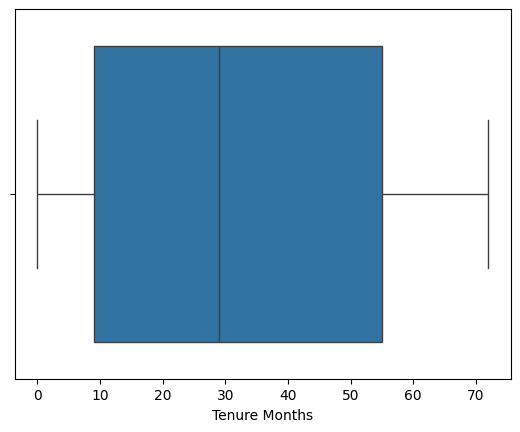

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x = dt_cleanV2.toPandas()['Tenure Months'])

<Axes: xlabel='Monthly Charges'>

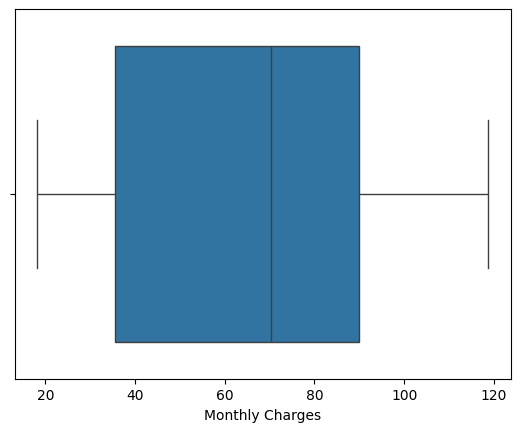

In [46]:
sns.boxplot(x = dt_cleanV2.toPandas()['Monthly Charges'])

<Axes: xlabel='Total Charges'>

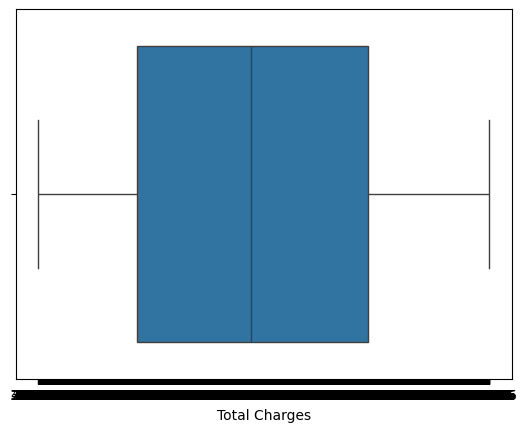

In [47]:
sns.boxplot(x = dt_cleanV2.toPandas()['Total Charges'])

จากการวิเคราะห์ภาพ Box plot ทั้ง 3 ภาพ ไม่พบ Outliers ที่ชัดเจน

* Tenure Months: ไม่มีจุดอยู่นอกหนวดทั้งสองข้าง

* Monthly Charges: ไม่มีจุดอยู่นอกหนวดทั้งสองข้าง

* Total Charges: ไม่มีจุดอยู่นอกหนวดทั้งสองข้าง

ดังนั้น ข้อมูลในคอลัมน์เหล่านี้ค่อนข้างเป็นปกติและไม่มีค่าที่ผิดปกติอย่างชัดเจน

## Data Transformation

In [126]:
from pyspark.sql.types import IntegerType, DoubleType

columns_to_convert = ["Monthly Charges", "Total Charges", "Tenure Months"]

df_transformed = dt_cleanV2
for col_name in columns_to_convert:
    df_transformed = df_transformed.withColumn(
        col_name,
        df_transformed[col_name].cast(DoubleType()) # ใช้ DoubleType สำหรับค่าที่มีทศนิยม
    )

df_transformed.printSchema()

root
 |-- Gender: string (nullable = true)
 |-- Senior Citizen: string (nullable = true)
 |-- Partner: string (nullable = true)
 |-- Dependents: string (nullable = true)
 |-- Tenure Months: double (nullable = true)
 |-- Phone Service: string (nullable = true)
 |-- Multiple Lines: string (nullable = true)
 |-- Internet Service: string (nullable = true)
 |-- Online Security: string (nullable = true)
 |-- Online Backup: string (nullable = true)
 |-- Device Protection: string (nullable = true)
 |-- Tech Support: string (nullable = true)
 |-- Streaming TV: string (nullable = true)
 |-- Streaming Movies: string (nullable = true)
 |-- Contract: string (nullable = true)
 |-- Paperless Billing: string (nullable = true)
 |-- Payment Method: string (nullable = true)
 |-- Monthly Charges: double (nullable = true)
 |-- Total Charges: double (nullable = true)
 |-- Churn Value: integer (nullable = true)



In [127]:
from pyspark.sql.functions import when, col
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml import Pipeline

# Start with a new DataFrame for processing
dt_final = df_transformed

columns_yn = [
    "Senior Citizen",
    "Partner",
    "Dependents",
    "Online Security",
    "Online Backup",
    "Device Protection",
    "Tech Support",
    "Streaming TV",
    "Streaming Movies",
    "Multiple Lines",
    "Paperless Billing",
    "Phone Service"
]

# 2. Convert all Yes/No columns to 1/0
for column in columns_yn:
    dt_final = dt_final.withColumn(
        column,
        when(col(column) == "Yes", 1).otherwise(0)
    )


# 3. Handle remaining categorical columns using Pipeline
categorical_cols = ["Gender", "Internet Service", "Contract", "Payment Method"]
indexed_cols = [f"{c}_indexed" for c in categorical_cols]
encoded_cols = [f"{c}_encoded" for c in categorical_cols]

# Create StringIndexers and OneHotEncoders
indexers = [
    StringIndexer(inputCol=c, outputCol=f"{c}_indexed")
    for c in categorical_cols
]
encoders = [
    OneHotEncoder(inputCol=c, outputCol=f"{c}_encoded")
    for c in indexed_cols
]

# Create a Pipeline to run all transformations
pipeline = Pipeline(stages=indexers + encoders)
df_encoded = pipeline.fit(dt_final).transform(dt_final)

# Show the schema and a few rows to verify the changes
df_encoded.printSchema()
df_encoded.show(truncate=False)

root
 |-- Gender: string (nullable = true)
 |-- Senior Citizen: integer (nullable = false)
 |-- Partner: integer (nullable = false)
 |-- Dependents: integer (nullable = false)
 |-- Tenure Months: double (nullable = true)
 |-- Phone Service: integer (nullable = false)
 |-- Multiple Lines: integer (nullable = false)
 |-- Internet Service: string (nullable = true)
 |-- Online Security: integer (nullable = false)
 |-- Online Backup: integer (nullable = false)
 |-- Device Protection: integer (nullable = false)
 |-- Tech Support: integer (nullable = false)
 |-- Streaming TV: integer (nullable = false)
 |-- Streaming Movies: integer (nullable = false)
 |-- Contract: string (nullable = true)
 |-- Paperless Billing: integer (nullable = false)
 |-- Payment Method: string (nullable = true)
 |-- Monthly Charges: double (nullable = true)
 |-- Total Charges: double (nullable = true)
 |-- Churn Value: integer (nullable = true)
 |-- Gender_indexed: double (nullable = false)
 |-- Internet Service_index

In [128]:
# รายการคอลัมน์ที่ไม่จำเป็น
columns_to_drop = [
     "Gender", "Internet Service", "Contract", "Payment Method"
]

# ดรอปคอลัมน์ออกจาก DataFrame ที่เข้ารหัสแล้ว (df_encoded)
dt_final = df_encoded.drop(*columns_to_drop)

# แสดง Schema ของ DataFrame สุดท้ายเพื่อตรวจสอบผลลัพธ์
dt_final.show(truncate=False)

+--------------+-------+----------+-------------+-------------+--------------+---------------+-------------+-----------------+------------+------------+----------------+-----------------+---------------+-------------+-----------+--------------+------------------------+----------------+----------------------+----------------------+--------------------------------+------------------------+------------------------------+
|Senior Citizen|Partner|Dependents|Tenure Months|Phone Service|Multiple Lines|Online Security|Online Backup|Device Protection|Tech Support|Streaming TV|Streaming Movies|Paperless Billing|Monthly Charges|Total Charges|Churn Value|Gender_indexed|Internet Service_indexed|Contract_indexed|Payment Method_indexed|Gender_indexed_encoded|Internet Service_indexed_encoded|Contract_indexed_encoded|Payment Method_indexed_encoded|
+--------------+-------+----------+-------------+-------------+--------------+---------------+-------------+-----------------+------------+------------+----

In [129]:
dt_final.show(10, truncate = False)

+--------------+-------+----------+-------------+-------------+--------------+---------------+-------------+-----------------+------------+------------+----------------+-----------------+---------------+-------------+-----------+--------------+------------------------+----------------+----------------------+----------------------+--------------------------------+------------------------+------------------------------+
|Senior Citizen|Partner|Dependents|Tenure Months|Phone Service|Multiple Lines|Online Security|Online Backup|Device Protection|Tech Support|Streaming TV|Streaming Movies|Paperless Billing|Monthly Charges|Total Charges|Churn Value|Gender_indexed|Internet Service_indexed|Contract_indexed|Payment Method_indexed|Gender_indexed_encoded|Internet Service_indexed_encoded|Contract_indexed_encoded|Payment Method_indexed_encoded|
+--------------+-------+----------+-------------+-------------+--------------+---------------+-------------+-----------------+------------+------------+----

In [131]:
from pyspark.sql.functions import col
from pyspark.ml.feature import VectorAssembler

#สร้างรายการคอลัมน์ทั้งหมดที่จะใช้เป็น features
feature_cols = [
    "Senior Citizen",
    "Partner",
    "Dependents",
    "Tenure Months",
    "Phone Service",
    "Multiple Lines",
    "Online Security",
    "Online Backup",
    "Device Protection",
    "Tech Support",
    "Streaming TV",
    "Streaming Movies",
    "Paperless Billing",
    "Monthly Charges",
    "Total Charges",
    "Gender_indexed_encoded",
    "Internet Service_indexed_encoded",
    "Contract_indexed_encoded",
    "Payment Method_indexed_encoded"
]

# ใช้ VectorAssembler เพื่อรวมคอลัมน์ทั้งหมดเข้าด้วยกัน
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
df_with_features = assembler.transform(dt_final)

# แสดง Schema เพื่อตรวจสอบผลลัพธ์
df_with_features.printSchema()
df_with_features.show(truncate=False)

root
 |-- Senior Citizen: integer (nullable = false)
 |-- Partner: integer (nullable = false)
 |-- Dependents: integer (nullable = false)
 |-- Tenure Months: double (nullable = true)
 |-- Phone Service: integer (nullable = false)
 |-- Multiple Lines: integer (nullable = false)
 |-- Online Security: integer (nullable = false)
 |-- Online Backup: integer (nullable = false)
 |-- Device Protection: integer (nullable = false)
 |-- Tech Support: integer (nullable = false)
 |-- Streaming TV: integer (nullable = false)
 |-- Streaming Movies: integer (nullable = false)
 |-- Paperless Billing: integer (nullable = false)
 |-- Monthly Charges: double (nullable = true)
 |-- Total Charges: double (nullable = true)
 |-- Churn Value: integer (nullable = true)
 |-- Gender_indexed: double (nullable = false)
 |-- Internet Service_indexed: double (nullable = false)
 |-- Contract_indexed: double (nullable = false)
 |-- Payment Method_indexed: double (nullable = false)
 |-- Gender_indexed_encoded: vector (n

## Data Export

In [138]:
import pyspark.sql.functions as F
from pyspark.sql.types import ArrayType, DoubleType
from pyspark.ml.linalg import VectorUDT

# สร้าง UDF สำหรับแปลง Vector เป็น Array
unpack_vector_udf = F.udf(lambda vector: vector.toArray().tolist() if vector else None, ArrayType(DoubleType()))

# เลือกเฉพาะคอลัมน์ที่เป็น Vector
vector_cols = ["Gender_indexed_encoded", "Internet Service_indexed_encoded", "Contract_indexed_encoded", "Payment Method_indexed_encoded"]

# สร้าง DataFrame ใหม่ที่มีคอลัมน์ Vector ถูกแปลงเป็น Array
df_with_unpacked_vectors = df_encoded
for col_name in vector_cols:
    df_with_unpacked_vectors = df_with_unpacked_vectors.withColumn(f"{col_name}_unpacked", unpack_vector_udf(F.col(col_name)))

# เลือกคอลัมน์ที่ต้องการเพื่อแปลงเป็น Pandas DataFrame
columns_for_pandas = [col.name for col in df_with_unpacked_vectors.schema.fields if col.dataType != VectorUDT()]

# แปลง DataFrame เป็น Pandas
pandas_df = df_with_unpacked_vectors.select(*columns_for_pandas).toPandas()

# บันทึกเป็นไฟล์ CSV โดยใช้ Pandas
pandas_df.to_csv("cleaned_data_output_final.csv", index=False)